# Sentiment Analysis of Twitter Data 

In this project we intend to tackle some important applications of sentiment anlysis that is to detect hate speech such as racism and sexism and also detecting signs of depression from tweets made by users on twitter.

We will be training various models on this data and compare the accuracy, precision, recall and f1 scores of these models.

Finally we will determine the best alfgorithm for this analysis along with the combination of parameters that gave us this result.

We will be using the following models on the twitter data:
1. Logisitic Regression
2. SVM
3. Linear SVC
4. Naive Bayes Classifier
5. XG Boost
6. KNN
7. Ada Boost
8. MLP Classifier

The data used in this project is a mixture of various data sets found on kaggle

# Importing Data

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [78]:
df = pd.read_csv('train_tweet.csv')
df = df.drop(['id'],axis=1)
df = df[['tweet','label']]
df

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
31957,ate @user isz that youuu?ðððððð...,0
31958,to see nina turner on the airwaves trying to...,0
31959,listening to sad songs on a monday morning otw...,0
31960,"@user #sikh #temple vandalised in in #calgary,...",1


## Preprocessing

Reference: The effect of preprocessing techniques on Twitter sentiment analysis

Process:
1. Removing unwanted emoticons, urls, hashtags, usernames and stop words.
2. Stemming
3. Lemmatization
4. Applying Tf-idf Vectorizer or Count Vectorizer

### 1. Lower Casing

In [79]:
df['tweet'] = df['tweet'].str.lower()

### 2. Removing Stop Words

In [80]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stop(tweet,stop_words):
    new_sent = ""
    words = word_tokenize(tweet)
    for i in words:
        if i not in stop_words:
            new_sent = new_sent + i
            new_sent = new_sent + " "
    return new_sent


### 3. Removing Hashtags, URLs and Usernames

In [81]:
import re
def clean_tweet(text):
    text1 = re.sub(r'@[A-Za-z0-9]+','',text)
    text2 = re.sub(r'#','',text1)
    hashtags = re.findall(r'#[A-Za-z0-9]+',text)
    hashtags = [i[1:] for i in hashtags]
    text3 = re.sub(r'RT[\s]+','',text2)
    text4 = re.sub(r'https?:\/\/\S+','',text3)
    return text4,hashtags


In [82]:
#!pip install tweet-preprocessor

### 4. Removing Emoticons and Symbols

In [84]:
import preprocessor as p
def remove_emoticons(tweet):
    tweet = p.clean(tweet)
    return tweet



### 5. Applying all to DataFrame

In [85]:
df_hashtags=[]
for i in df['tweet']:
    new_tweet,row = clean_tweet(i)
    df_hashtags.append(row)

df['modified_tweet'] = df['tweet'].apply(lambda x:clean_tweet(x)[0])

df['hashtags'] = df_hashtags
df['modified_tweet']= df['modified_tweet'].apply(lambda x:remove_stop(x,stop_words))
df

,tweet,label,modified_tweet,hashtags
0,@user when a father is dysfunctional and is s...,0,father dysfunctional selfish drags kids dysfun...,[run]
1,@user @user thanks for #lyft credit i can't us...,0,thanks lyft credit ca n't use cause n't offer ...,"[lyft, disapointed, getthanked]"
2,bihday your majesty,0,bihday majesty,[]
3,#model i love u take with u all the time in ...,0,model love u take u time urð± ! ! ! ðð...,[model]
4,factsguide: society now #motivation,0,factsguide : society motivation,[motivation]
...,...,...,...,...
31957,ate @user isz that youuu?ðððððð...,0,ate isz youuu ? ðððððððð...,[]
31958,to see nina turner on the airwaves trying to...,0,see nina turner airwaves trying wrap mantle ge...,"[shame, imwithher]"
31959,listening to sad songs on a monday morning otw...,0,listening sad songs monday morning otw work sad,[]
31960,"@user #sikh #temple vandalised in in #calgary,...",1,"sikh temple vandalised calgary , wso condemns ...","[sikh, temple, calgary, wso]"


### 6. Lemmatization

In [9]:
import nltk
#nltk.download('wordnet')

In [10]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df['modified_tweet'] = df['modified_tweet'].apply(lambda x:remove_emoticons(x))
df['modified_tweet'] = df['modified_tweet'].apply(lambda x:lemmatize_words(x))


"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [11]:
text_blob = ' '.join([tweets for tweets in df['modified_tweet']])


In [12]:
df

,tweet,label,modified_tweet,hashtags
0,@user when a father is dysfunctional and is s...,0,father dysfunctional selfish drag kid dysfunct...,[run]
1,@user @user thanks for #lyft credit i can't us...,0,thanks lyft credit ca n't use cause n't offer ...,"[lyft, disapointed, getthanked]"
2,bihday your majesty,0,bihday majesty,[]
3,#model i love u take with u all the time in ...,0,model love u take u time ur ! ! !,[model]
4,factsguide: society now #motivation,0,factsguide : society motivation,[motivation]
...,...,...,...,...
31957,ate @user isz that youuu?ðððððð...,0,ate isz youuu ?,[]
31958,to see nina turner on the airwaves trying to...,0,see nina turner airwave trying wrap mantle gen...,"[shame, imwithher]"
31959,listening to sad songs on a monday morning otw...,0,listening sad song monday morning otw work sad,[]
31960,"@user #sikh #temple vandalised in in #calgary,...",1,"sikh temple vandalised calgary , wso condemns act","[sikh, temple, calgary, wso]"


In [15]:
from wordcloud import WordCloud, STOPWORDS

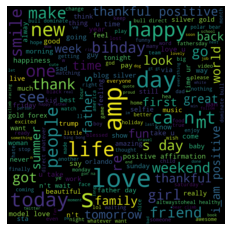

In [16]:
wordCloud = WordCloud(width=1000,height=1000,random_state=0,max_font_size=119).generate(text_blob)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
df_1 = df[df['label']==1]

In [18]:
text_blob_1 = ' '.join([tweets for tweets in df_1['modified_tweet']])

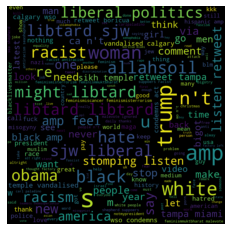

In [19]:
wordCloud = WordCloud(width=1000,height=1000,random_state=0,max_font_size=119).generate(text_blob_1)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

So our data has been cleaned properly and now we can train models on this text data

### 7. Vectorization

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(df[['modified_tweet','hashtags']],df['label'],random_state=0)
y_test.value_counts()

0    7460
1     531
Name: label, dtype: int64

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
count_vect_train = CountVectorizer().fit(X_train['modified_tweet'])
tfidf_vect_train = TfidfVectorizer().fit(X_train['modified_tweet'])
X_count_train = count_vect_train.transform(X_train['modified_tweet'])
X_tfidf_train = tfidf_vect_train.transform(X_train['modified_tweet'])
count_vect_test = CountVectorizer().fit(X_train['modified_tweet'])
tfidf_vect_test = TfidfVectorizer().fit(X_train['modified_tweet'])
X_count_test = count_vect_test.transform(X_test['modified_tweet'])
X_tfidf_test = tfidf_vect_test.transform(X_test['modified_tweet'])

## Model Training

In [24]:
def cm(y_test,y_pred):
    mat = confusion_matrix(y_test,y_pred)
    prec = mat[1][1]/(mat[1][1]+mat[1][0])
    recall = mat[1][1]/(mat[1][1]+mat[0][1])
    col1 = ['True Positive:'+str(mat[1][1]),'False Negative:'+str(mat[0][1]),'Precision:'+str(prec)]
    col2 = ['False Positive:'+str(mat[1][0]),'True Negative:'+str(mat[0][0]),'Recall:'+str(recall)]
    df_conf = pd.DataFrame({'0':col1,'1':col2})
    return df_conf

In [25]:
def find_metrics(preds1,preds2,algorithm):
    prec=[]
    recall = []
    param = []
    f1 = []
    acc = []
    df = cm(y_test,preds1)
    prec.append(str(df['0'].iloc[2]))
    recall.append(df['1'].iloc[2])
    mat = confusion_matrix(y_test,preds1)
    prec1 = mat[1][1]/(mat[1][1]+mat[1][0])
    recall1 = mat[1][1]/(mat[1][1]+mat[0][1])
    f = (2*prec1*recall1)/(prec1+recall1)
    f1.append(str(f))  
    
    df = cm(y_test,preds2)
    prec.append(str(df['0'].iloc[2]))
    recall.append(df['1'].iloc[2])
    mat = confusion_matrix(y_test,preds2)
    prec1 = mat[1][1]/(mat[1][1]+mat[1][0])
    recall1 = mat[1][1]/(mat[1][1]+mat[0][1])
    f = (2*prec1*recall1)/(prec1+recall1)
    f1.append(str(f))  
    correct_preds_1 = 0
    correct_preds_2 = 0
    for i in range(len(preds1)):
        if preds1[i] == list(y_test)[i]:
            correct_preds_1+=1
    for j in range(len(preds2)):
        if preds2[j] == list(y_test)[j]:
            correct_preds_2+=1
    acc1 = correct_preds_1/len(preds1)
    acc2 = correct_preds_2/len(preds2)
    acc.append(acc1)
    acc.append(acc2)
    df2 = pd.DataFrame({'Algorithm':algorithm,'Precision':prec,'Recall':recall,'F1-score':f1,'Accuracy':acc})
    df2.index = ['Count Vecotrizer','Tf-idf Vectorizer']
    return df2
    

### 1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

In [28]:
clf1 = LogisticRegression(C=6,max_iter=500).fit(X_count_train,y_train)
clf2 = LogisticRegression(C=110,max_iter=500).fit(X_tfidf_train,y_train)

In [29]:
preds1 = list(clf1.predict(X_count_test))
preds2 = list(clf2.predict(X_tfidf_test))

In [30]:
df_logistic = find_metrics(preds1,preds2,'Logistic Regression')
df_logistic

,Algorithm,Precision,Recall,F1-score,Accuracy
Count Vecotrizer,Logistic Regression,Precision:0.5894538606403014,Recall:0.830238726790451,0.6894273127753304,0.96471
Tf-idf Vectorizer,Logistic Regression,Precision:0.6195856873822976,Recall:0.80440097799511,0.7,0.96471


Both methods maximize at an f1 score of 0.7 approximately and the count vectroizer gives a better score than tfidf vectorizerfor Logistic regression

### 2. Support Vector Machines

In [32]:
from sklearn.svm import SVC

In [34]:
clf1 = SVC(C=10).fit(X_count_train,y_train)
clf2 = SVC(C=10).fit(X_tfidf_train,y_train)

In [35]:
preds1 = clf1.predict(X_count_test)
preds2 = clf2.predict(X_tfidf_test)

In [36]:
df_svm = find_metrics(preds1,preds2,"SVM")
df_svm

,Algorithm,Precision,Recall,F1-score,Accuracy
Count Vecotrizer,SVM,Precision:0.519774011299435,Recall:0.8761904761904762,0.652482269503546,0.963209
Tf-idf Vectorizer,SVM,Precision:0.5310734463276836,Recall:0.9038461538461539,0.6690391459074733,0.965086


### 3. Decision Trees

In [37]:
from sklearn import tree

In [38]:
clf_count = tree.DecisionTreeClassifier(class_weight={0:1,1:7}).fit(X_count_train,y_train)
clf_tfidf = tree.DecisionTreeClassifier(class_weight={0:1,1:7}).fit(X_tfidf_train,y_train)


In [39]:
ans = pd.Series(clf_count.predict(X_count_test))
ans.value_counts()

0    7264
1     727
dtype: int64

In [40]:
def analyze(params):
    prec=[]
    recall = []
    param = []
    f1 = []
    for i in params:
        clf = tree.DecisionTreeClassifier(class_weight={0:1,1:i}).fit(X_count_train,y_train)
        preds = clf.predict(X_count_test)
        df = cm(y_test,preds)
        prec.append(str(df['0'].iloc[2]))
        recall.append(df['1'].iloc[2])
        mat = confusion_matrix(y_test,preds)
        prec1 = mat[1][1]/(mat[1][1]+mat[1][0])
        recall1 = mat[1][1]/(mat[1][1]+mat[0][1])
        f = (2*prec1*recall1)/(prec1+recall1)
        f1.append(str(f))
        param.append(i)
    df1 = pd.DataFrame({'C':param,'Precision':prec,'Recall':recall,'F1-score':f1})
    prec=[]
    recall = []
    param = []
    f1 = []
    for i in params:
        clf = tree.DecisionTreeClassifier(class_weight={0:1,1:i}).fit(X_tfidf_train,y_train)
        preds = clf.predict(X_tfidf_test)
        df = cm(y_test,preds)
        prec.append(str(df['0'].iloc[2]))
        recall.append(df['1'].iloc[2])
        mat = confusion_matrix(y_test,preds)
        prec1 = mat[1][1]/(mat[1][1]+mat[1][0])
        recall1 = mat[1][1]/(mat[1][1]+mat[0][1])
        f = (2*prec1*recall1)/(prec1+recall1)
        f1.append(str(f))
        param.append(i)   
    df2 = pd.DataFrame({'C':param,'Precision':prec,'Recall':recall,'F1-score':f1})
    return df1,df2
df1,df2 = analyze([1])
df1,df2

(   C                    Precision                     Recall  \
 0  1  Precision:0.623352165725047  Recall:0.6727642276422764   
 
              F1-score  
 0  0.6471163245356794  ,
    C                     Precision                     Recall  \
 0  1  Precision:0.6120527306967984  Recall:0.6109022556390977   
 
              F1-score  
 0  0.6114769520225776  )

In [41]:
#class_weight={0:1,1:1},class_weight={0:1,1:1}

In [42]:
clf1 = tree.DecisionTreeClassifier(class_weight={0:1,1:1}).fit(X_count_train,y_train)
clf2 = tree.DecisionTreeClassifier(class_weight={0:1,1:1}).fit(X_tfidf_train,y_train)

In [43]:
preds1 = clf1.predict(X_count_test)
preds2 = clf2.predict(X_tfidf_test)

In [44]:
df_tree = find_metrics(preds1,preds2,'Decision Tree')
df_tree

,Algorithm,Precision,Recall,F1-score,Accuracy
Count Vecotrizer,Decision Tree,Precision:0.6101694915254238,Recall:0.6585365853658537,0.6334310850439884,0.953072
Tf-idf Vectorizer,Decision Tree,Precision:0.6045197740112994,Recall:0.6022514071294559,0.6033834586466166,0.947191


### 4. LinearSVC

In [45]:
from sklearn.svm import LinearSVC

In [46]:
clf1 = LinearSVC(C=10,max_iter=2000).fit(X_count_train,y_train)
clf2 = LinearSVC(C=10,max_iter=2000).fit(X_tfidf_train,y_train)
pred1 = clf1.predict(X_count_test)
pred2 = clf2.predict(X_tfidf_test)

In [47]:
df_linearsvc = find_metrics(pred1,pred2,'Linear SVC')
df_linearsvc

,Algorithm,Precision,Recall,F1-score,Accuracy
Count Vecotrizer,Linear SVC,Precision:0.6365348399246704,Recall:0.6525096525096525,0.6444232602478551,0.953322
Tf-idf Vectorizer,Linear SVC,Precision:0.64030131826742,Recall:0.721868365180467,0.6786427145708583,0.959705


In [48]:
prec=[]
recall = []
param = []


f1 = []
df = cm(y_test,pred2)
prec.append(str(df['0'].iloc[2]))
recall.append(df['1'].iloc[2])
mat = confusion_matrix(y_test,pred2)
prec1 = mat[1][1]/(mat[1][1]+mat[1][0])
recall1 = mat[1][1]/(mat[1][1]+mat[0][1])
f = (2*prec1*recall1)/(prec1+recall1)
f1.append(str(f))
param.append(i)   
df2 = pd.DataFrame({'Algorithm':'LinearSVC','Precision':prec,'Recall':recall,'F1-score':f1})
df2

,Algorithm,Precision,Recall,F1-score
0,LinearSVC,Precision:0.64030131826742,Recall:0.721868365180467,0.6786427145708583


### 5. Naive Bayes Classifier

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
np.random.seed(10)

remove_n = 10000
X_train_nb_1 = X_train.copy()
X_train_nb_2 = X_train.copy()

drop_indices_1 = np.random.choice(X_train_nb_1.index, remove_n, replace=False)
drop_indices_2 = np.random.choice(X_train_nb_2.index, remove_n, replace=False)
X_train_nb_1 = X_train_nb_1.drop(drop_indices_1)
X_train_nb_2 = X_train_nb_2.drop(drop_indices_2)
y_train_nb_1 = y_train.copy()
y_train_nb_2 = y_train.copy()
y_train_nb_1 = y_train_nb_1.drop(drop_indices_1)
y_train_nb_2 = y_train_nb_2.drop(drop_indices_2)


count_vect_train = CountVectorizer().fit(X_train_nb_1['modified_tweet'])
tfidf_vect_train = TfidfVectorizer().fit(X_train_nb_2['modified_tweet'])
X_count_train_nb_1 = count_vect_train.transform(X_train_nb_1['modified_tweet'])
X_tfidf_train_nb_2 = tfidf_vect_train.transform(X_train_nb_2['modified_tweet'])

X_count_train_nb_1 = X_count_train_nb_1.toarray()
X_tfidf_train_nb_2 = X_tfidf_train_nb_2.toarray()


In [51]:
np.random.seed(10)

remove_n = 5000
X_test_nb_1 = X_test.copy()
X_test_nb_2 = X_test.copy()

drop_indices_1 = np.random.choice(X_test_nb_1.index, remove_n, replace=False)
drop_indices_2 = np.random.choice(X_test_nb_2.index, remove_n, replace=False)
X_test_nb_1 = X_test_nb_1.drop(drop_indices_1)
X_test_nb_2 = X_test_nb_2.drop(drop_indices_2)
y_test_nb_1 = y_test.copy()
y_test_nb_2 = y_test.copy()
y_test_nb_1 = y_test_nb_1.drop(drop_indices_1)
y_test_nb_2 = y_test_nb_2.drop(drop_indices_2)


count_vect_test = CountVectorizer().fit(X_train_nb_1['modified_tweet'])
tfidf_vect_test = TfidfVectorizer().fit(X_train_nb_2['modified_tweet'])
X_test_nb_1 = count_vect_test.transform(X_test_nb_1['modified_tweet'])
X_test_nb_2 = tfidf_vect_test.transform(X_test_nb_2['modified_tweet'])

X_test_nb_1 = X_test_nb_1.toarray()
X_test_nb_2 = X_test_nb_2.toarray()



In [52]:
clf1 = MultinomialNB().fit(X_count_train_nb_1,y_train_nb_1)
clf2 = MultinomialNB().fit(X_tfidf_train_nb_2,y_train_nb_2)
pred1 = clf1.predict(X_test_nb_1)
pred2 = clf2.predict(X_test_nb_2)

In [53]:
def find_metrics_nb(y_test_nb_1,y_test_nb_2,preds1,preds2,algorithm):
    prec=[]
    recall = []
    param = []
    f1 = []
    acc = []
    df = cm(y_test_nb_1,preds1)
    prec.append(str(df['0'].iloc[2]))
    recall.append(df['1'].iloc[2])
    mat = confusion_matrix(y_test_nb_1,preds1)
    prec1 = mat[1][1]/(mat[1][1]+mat[1][0])
    recall1 = mat[1][1]/(mat[1][1]+mat[0][1])
    f = (2*prec1*recall1)/(prec1+recall1)
    f1.append(str(f))  
    
    df = cm(y_test_nb_2,preds2)
    prec.append(str(df['0'].iloc[2]))
    recall.append(df['1'].iloc[2])
    mat = confusion_matrix(y_test_nb_2,preds2)
    prec1 = mat[1][1]/(mat[1][1]+mat[1][0])
    recall1 = mat[1][1]/(mat[1][1]+mat[0][1])
    f = (2*prec1*recall1)/(prec1+recall1)
    f1.append(str(f))  
    correct_preds_1 = 0
    correct_preds_2 = 0
    for i in range(len(preds1)):
        if preds1[i] == list(y_test)[i]:
            correct_preds_1+=1
    for j in range(len(preds2)):
        if preds2[j] == list(y_test)[j]:
            correct_preds_2+=1
    acc1 = correct_preds_1/len(preds1)
    acc2 = correct_preds_2/len(preds2)
    acc.append(acc1)
    acc.append(acc2)
    df2 = pd.DataFrame({'Algorithm':algorithm,'Precision':prec,'Recall':recall,'F1-score':f1,'Accuracy':acc})
    df2.index = ['Count Vecotrizer','Tf-idf Vectorizer']
    return df2
    

In [54]:
df_nb = find_metrics_nb(y_test_nb_1,y_test_nb_2,pred1,pred2,'Naive Bayes')
df_nb

,Algorithm,Precision,Recall,F1-score,Accuracy
Count Vecotrizer,Naive Bayes,Precision:0.45077720207253885,Recall:0.925531914893617,0.6062717770034842,0.914744
Tf-idf Vectorizer,Naive Bayes,Precision:0.0947867298578199,Recall:1.0,0.17316017316017313,0.936142


### XG Boost

In [55]:
#!pip install xgboost
from xgboost import XGBClassifier

In [56]:
clf1 = XGBClassifier(learning_rate=0.8,max_depth=15,sub_samples=4,objective='reg:logistic').fit(X_count_train, y_train)
clf2 = XGBClassifier(learning_rate=0.8,max_depth=20,sub_samples=4,objective='reg:logistic').fit(X_tfidf_train, y_train)


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "sub_samples" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "sub_samples" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [57]:
preds1 = clf1.predict(X_count_test)
preds2 = clf2.predict(X_tfidf_test)


In [58]:
df_xg = find_metrics(preds1,preds2,'XG Boost')
df_xg

,Algorithm,Precision,Recall,F1-score,Accuracy
Count Vecotrizer,XG Boost,Precision:0.5348399246704332,Recall:0.7759562841530054,0.633221850613155,0.958829
Tf-idf Vectorizer,XG Boost,Precision:0.5160075329566854,Recall:0.7527472527472527,0.612290502793296,0.956576


### KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
clf1 = KNeighborsClassifier(n_neighbors=1).fit(X_count_train, y_train)
clf2 = KNeighborsClassifier(n_neighbors=1).fit(X_tfidf_train, y_train)


In [61]:
pred1 = clf1.predict(X_count_test)
pred2 = clf2.predict(X_tfidf_test)

In [62]:
df_knn = find_metrics(pred1,pred2,"KNN")
df_knn

,Algorithm,Precision,Recall,F1-score,Accuracy
Count Vecotrizer,KNN,Precision:0.3653483992467043,Recall:0.7158671586715867,0.4837905236907731,0.948192
Tf-idf Vectorizer,KNN,Precision:0.3634651600753296,Recall:0.9018691588785047,0.5181208053691276,0.955074


### Ada Boost

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
clf1 = AdaBoostClassifier(n_estimators=60,learning_rate=1).fit(X_count_train,y_train)
clf2 = AdaBoostClassifier(n_estimators=60,learning_rate=1).fit(X_tfidf_train,y_train)

In [65]:
pred1 = clf1.predict(X_count_test)
pred2 = clf2.predict(X_tfidf_test)

In [66]:
df_ada = find_metrics(pred1,pred2,"Ada Boost")
df_ada

,Algorithm,Precision,Recall,F1-score,Accuracy
Count Vecotrizer,Ada Boost,Precision:0.3898305084745763,Recall:0.7961538461538461,0.5233881163084704,0.952822
Tf-idf Vectorizer,Ada Boost,Precision:0.3785310734463277,Recall:0.7730769230769231,0.5082174462705437,0.951320


### MLP Classifier

In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
clf1 = MLPClassifier().fit(X_count_train,y_train)


In [69]:
clf2 = MLPClassifier().fit(X_tfidf_train,y_train)

In [70]:
pred1 = clf1.predict(X_count_test)
pred2 = clf2.predict(X_tfidf_test)

In [71]:
df_mlp = find_metrics(pred1,pred2,"MLP Classifier")
df_mlp

,Algorithm,Precision,Recall,F1-score,Accuracy
Count Vecotrizer,MLP Classifier,Precision:0.6139359698681732,Recall:0.6749482401656315,0.6429980276134122,0.954699
Tf-idf Vectorizer,MLP Classifier,Precision:0.6365348399246704,Recall:0.6733067729083665,0.654404646660213,0.955325


In [72]:
df_list = [df_logistic,df_svm,df_tree,df_linearsvc,df_nb,df_xg,df_knn,df_ada,df_mlp]
# df_results = df_list[0]
# for i in range(1,len(df_list)):
#     df_results = pd.merge(df_results,df_list[i],left_index=True, right_index=True)
# df_results
df_results = pd.concat(df_list)
df_results['Precision'] = df_results['Precision'].apply(lambda x:100*float(x[10:15]))
df_results['Recall'] = df_results['Recall'].apply(lambda x:100*float(x[7:12]))
df_results['F1-score'] = df_results['F1-score'].apply(lambda x:100*float(x[0:5]))
df_results['Accuracy'] = df_results['Accuracy'].apply(lambda x:100*float(str(x)[0:5]))

df_results

,Algorithm,Precision,Recall,F1-score,Accuracy
Count Vecotrizer,Logistic Regression,58.9,83.0,68.9,96.4
Tf-idf Vectorizer,Logistic Regression,61.9,80.4,70.0,96.4
Count Vecotrizer,SVM,51.9,87.6,65.2,96.3
Tf-idf Vectorizer,SVM,53.1,90.3,66.9,96.5
Count Vecotrizer,Decision Tree,61.0,65.8,63.3,95.3
Tf-idf Vectorizer,Decision Tree,60.4,60.2,60.3,94.7
Count Vecotrizer,Linear SVC,63.6,65.2,64.4,95.3
Tf-idf Vectorizer,Linear SVC,64.0,72.1,67.8,95.9
Count Vecotrizer,Naive Bayes,45.0,92.5,60.6,91.4
Tf-idf Vectorizer,Naive Bayes,9.4,100.0,17.3,93.6
